Sales Prediction using Python

By Elma Fortunate Phiri

Objective:
The objective of this project is to develop a predictive model that estimates sales based on different advertising expenditures, including TV, Radio, and Newspaper advertisements. By analyzing the relationship between advertising budgets and sales performance, the project aims to identify key factors influencing sales and improve decision-making for marketing investments.

Dataset Overview:
Features:

TV: Advertising budget spent on TV (in thousands of dollars).

Radio: Advertising budget spent on Radio.

Newspaper: Advertising budget spent on Newspaper.

Target:

Sales: Product sales (in thousands of units).

Importing Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
%matplotlib inline

warnings.filterwarnings(category=FutureWarning, action= "ignore")


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn. preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer

Data Loading

In [3]:
sales= pd.read_csv("D:\\desktop\\Portfolio projects\\Python\\Sales Prediction\\Advertising.csv")
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Data Exploration

In [4]:
#Profile Report
pp.ProfileReport(sales)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
sales.shape

(200, 5)

In [9]:
sales["Unnamed: 0"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
sales.sample(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
32,33,97.2,1.5,30.0,9.6
49,50,66.9,11.7,36.8,9.7
100,101,222.4,4.3,49.8,11.7
40,41,202.5,22.3,31.6,16.6
136,137,25.6,39.0,9.3,9.5
51,52,100.4,9.6,3.6,10.7
54,55,262.7,28.8,15.9,20.2
5,6,8.7,48.9,75.0,7.2
126,127,7.8,38.9,50.6,6.6
92,93,217.7,33.5,59.0,19.4


Data Cleaning

In [11]:
#Checking for null values
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
#Checking for duplicate values
sales.duplicated().sum()

0

In [13]:
#drop Unnamed colum
sales.drop("Unnamed: 0", axis = 1, inplace= True)
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
corr= sales.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Exploratory Data Analysis

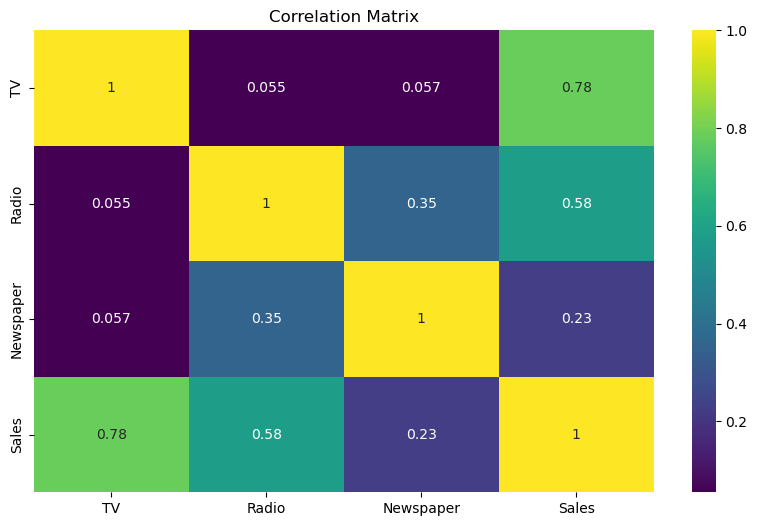

In [16]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap= 'viridis')
plt.title("Correlation Matrix");

Key correlations with Sales:

TV: 0.78 (strong positive).

Radio: 0.58 (moderate positive).

Newspaper: 0.35 (weak positive).

TV ads are the most influential driver of sales, followed by Radio. Newspaper has minimal impact.

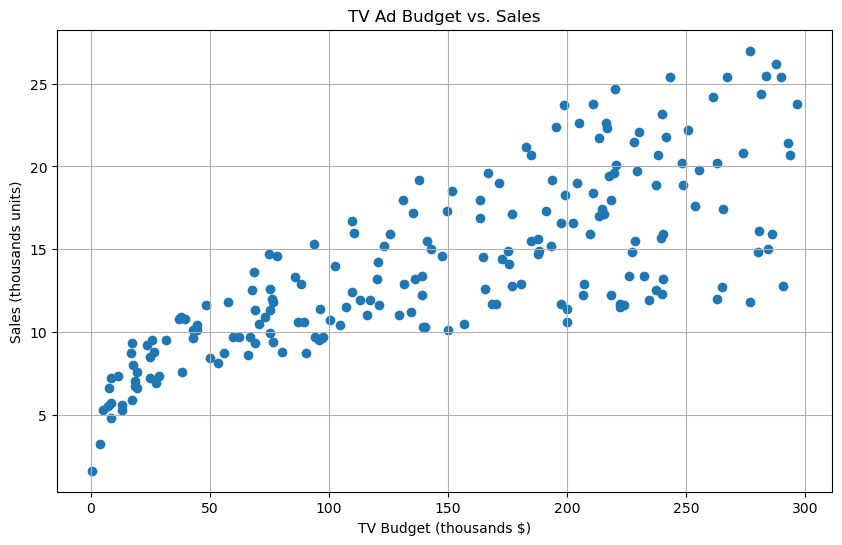

In [17]:
#Relationship between TV advertisement and Sales
plt.figure(figsize=(10,6))
plt.scatter(y= sales["Sales"], x=sales["TV"] )
plt.xlabel("TV Budget (thousands $)")
plt.ylabel("Sales (thousands units)")
plt.title("TV Ad Budget vs. Sales")
plt.grid();

The plot shows a strong positive correlation, meaning higher TV ad spending leads to higher sales.
The relationship appears more linear indicating that TV advertising has the most significant impact on sales

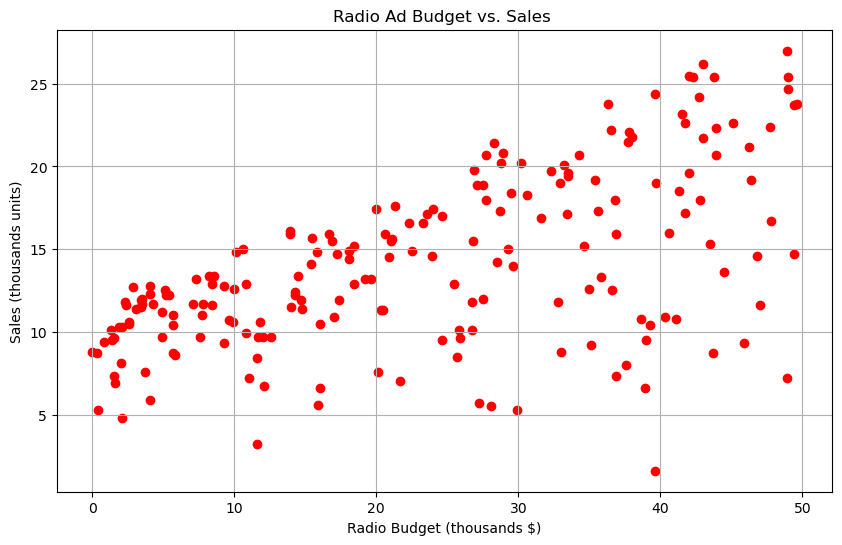

In [18]:
#Relationship between Radio advertisment and Sales
plt.figure(figsize=(10,6))
plt.scatter(y= sales["Sales"], x= sales["Radio"], color = "red")
plt.ylabel("Sales (thousands units)")
plt.xlabel("Radio Budget (thousands $)")
plt.title("Radio Ad Budget vs. Sales ")
plt.grid();

The scatter plot shows a moderate positive correlation, meaning as spending on radio advertisements increases, sales tend to rise.
However, the relationship is not perfectly linear, indicating some variability.

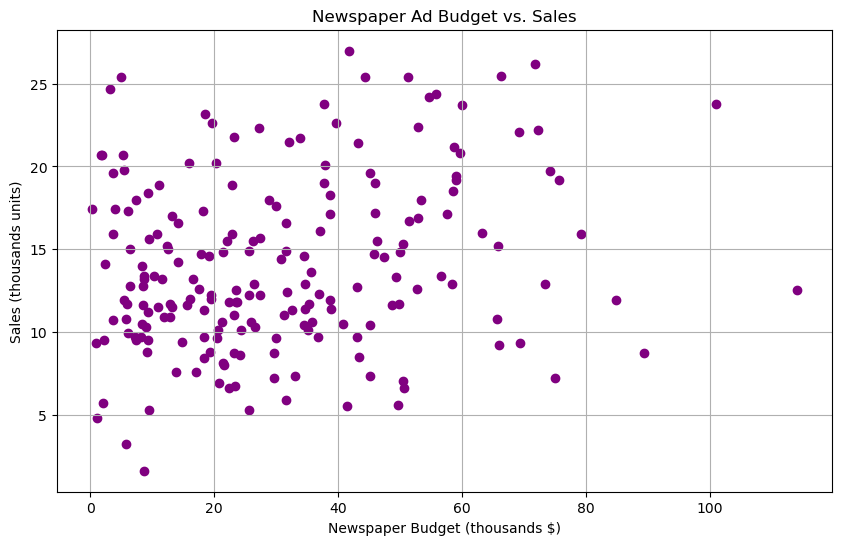

In [19]:
#Relationship between Newspaper advertisment and Sales
plt.figure(figsize=(10,6))
plt.scatter(y= sales["Sales"], x= sales["Newspaper"], color = "purple")
plt.ylabel("Sales (thousands units)")
plt.xlabel("Newspaper Budget (thousands $)")
plt.title("Newspaper Ad Budget vs. Sales")
plt.grid();

The points are scattered without a clear trend, suggesting no strong correlation between newspaper advertising and sales.
This implies that increasing the newspaper advertising budget may not significantly impact sales.

In [20]:
avg_sales= sales["Sales"].mean().round(2)
print("Average sales across different advertising mediums: \n",avg_sales)

Average sales across different advertising mediums: 
 14.02


In [21]:
print(sales[["TV", "Radio", "Newspaper"]].describe())


               TV       Radio   Newspaper
count  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000
std     85.854236   14.846809   21.778621
min      0.700000    0.000000    0.300000
25%     74.375000    9.975000   12.750000
50%    149.750000   22.900000   25.750000
75%    218.825000   36.525000   45.100000
max    296.400000   49.600000  114.000000


In [22]:
# mean sales for each medium
avg_sales_tv = sales["TV"].mean().round(2)
avg_sales_radio = sales["Radio"].mean().round(2)
avg_sales_news = sales["Newspaper"].mean().round(2)

sales_avg_medium = [avg_sales_tv, avg_sales_radio, avg_sales_news]
labels = ["TV", "Radio", "Newspaper"]

print("Average Sales Contribution:")
for label, avg in zip(labels, sales_avg_medium):
    print(f"{label}: ${avg}")

Average Sales Contribution:
TV: $147.04
Radio: $23.26
Newspaper: $30.55


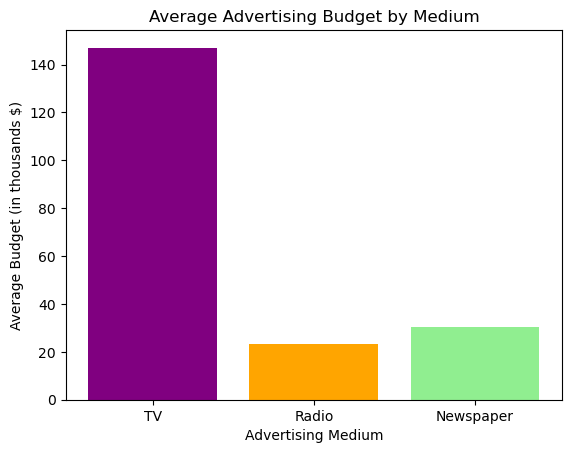

In [23]:
# Visualization
plt.bar(labels, sales_avg_medium, color=["purple", "orange", "lightgreen"])
plt.title("Average Advertising Budget by Medium")
plt.xlabel("Advertising Medium")
plt.ylabel("Average Budget (in thousands $)")
plt.show()

This visualization highlights the dominance of TV advertising in terms of budget allocation compared to radio and newspapers.

<Figure size 1200x1000 with 0 Axes>

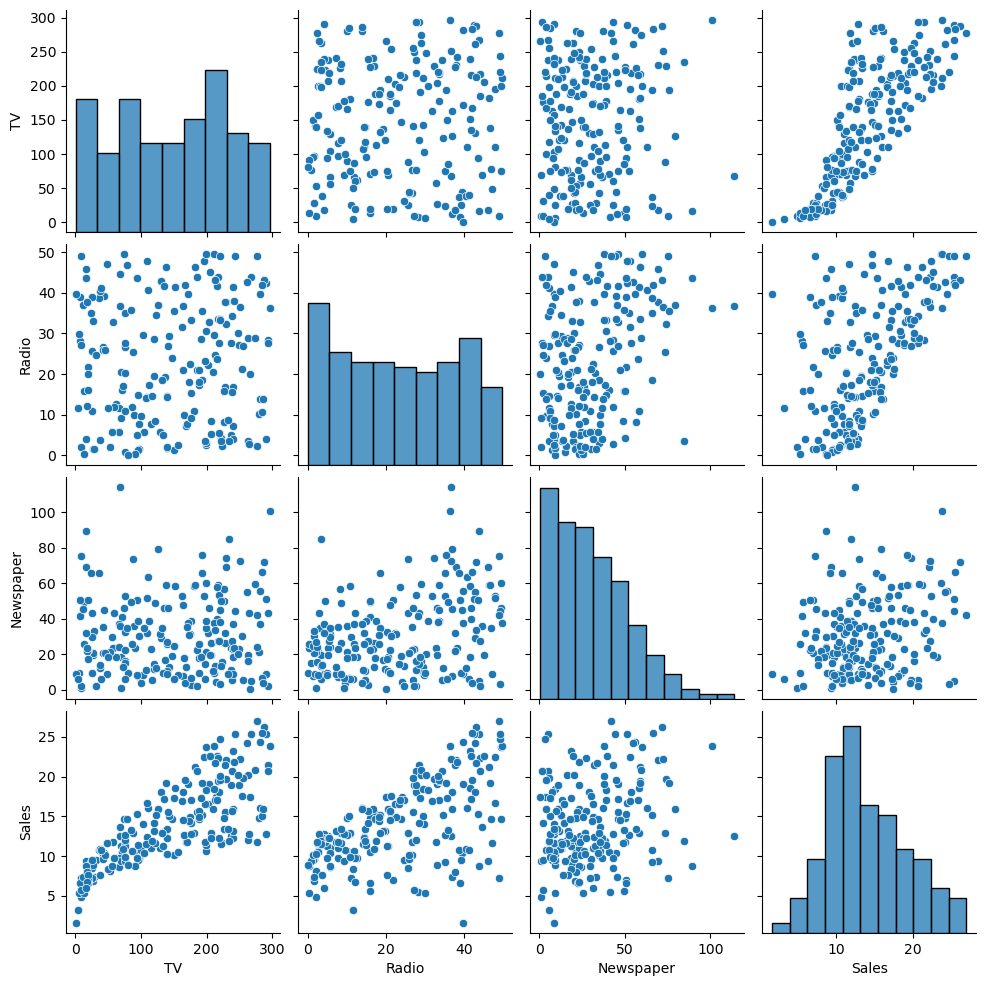

In [24]:
plt.figure(figsize=(12,10))
sns.pairplot(sales);

This scatter matrix shows the relationships between TV, Radio, Newspaper, and Sales.
The diagonal histograms show the distribution of each variable.
The scatter plots reveal a strong positive correlation between TV and Sales, whereas Radio and Newspaper have weaker relationships.

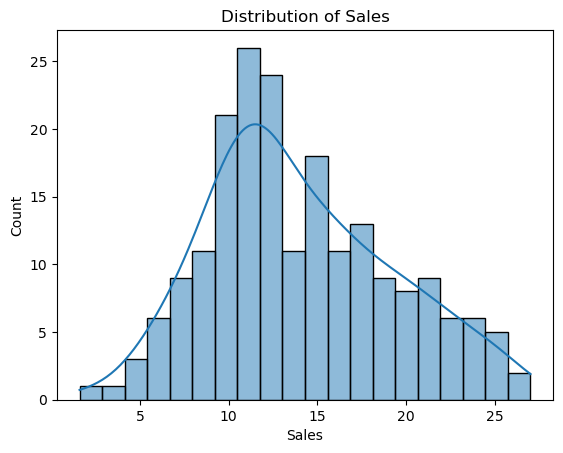

In [25]:
#Distribution of the target variable
sns.histplot(x= 'Sales',kde= True,bins=20,data= sales)
plt.title("Distribution of Sales")
plt.xlabel("Sales");

This histogram with a KDE (Kernel Density Estimation) overlay represents the distribution of sales.
It is slightly right-skewed, with most sales values concentrated around 10 to 15.

In [26]:
#Split the data
X= sales.drop("Sales", axis= 1)
y= sales["Sales"]
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (200, 3)
Shape of y (200,)


In [27]:
#Splitting data into training and testing sets
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print("Shape of X_train",X_train.shape)
print("Shape of X_test", X_test.shape)

Shape of X_train (160, 3)
Shape of X_test (40, 3)


In [28]:
#Baseline Model
y_pred_baseline= [y_train.mean()]* len(y_train)
mse_baseline= mean_squared_error(y_train,y_pred_baseline)
print(f"The MSE of the baseline model is {mse_baseline}")

The MSE of the baseline model is 25.93625


In [29]:
 #Model train
model= make_pipeline(
StandardScaler(),
LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [30]:
acc_train=model.score(X_train,y_train)
acc_test= model.score(X_test, y_test)
print("Model accuracy using Training data", acc_train)
print("Model accuracy using Test data", acc_test)


Model accuracy using Training data 0.8957008271017817
Model accuracy using Test data 0.899438024100912


In [31]:
y_pred= model.predict(X_test)
y_pred[:3]

array([16.4080242 , 20.88988209, 21.55384318])

Model Evaluation

In [32]:
#Mean squared error
model_mse= mean_squared_error(y_test,y_pred)
print(f"The MSE of the model is {model_mse}")

The MSE of the model is 3.174097353976104


In [33]:
#Root mean squared error
rmse = np.sqrt(model_mse)
print(f"The RMSE of the model is {rmse}")

The RMSE of the model is 1.7815996615334502


In [34]:
#Mean absolute error
model_mae= mean_squared_error(y_test,y_pred)
print(f"The MAE of the model is {model_mae}")

The MAE of the model is 3.174097353976104


In [35]:
#R2 score
model_r2= r2_score(y_test,y_pred)
print(f"The R2 score of the  model is {model_r2}")

The R2 score of the  model is 0.899438024100912


In [36]:
#Feature importances
features= X.columns
importance= model.named_steps["linearregression"].coef_

feat_imp= pd.Series(importance, index= features)
feat_imp

TV           3.764196
Radio        2.792307
Newspaper    0.055976
dtype: float64

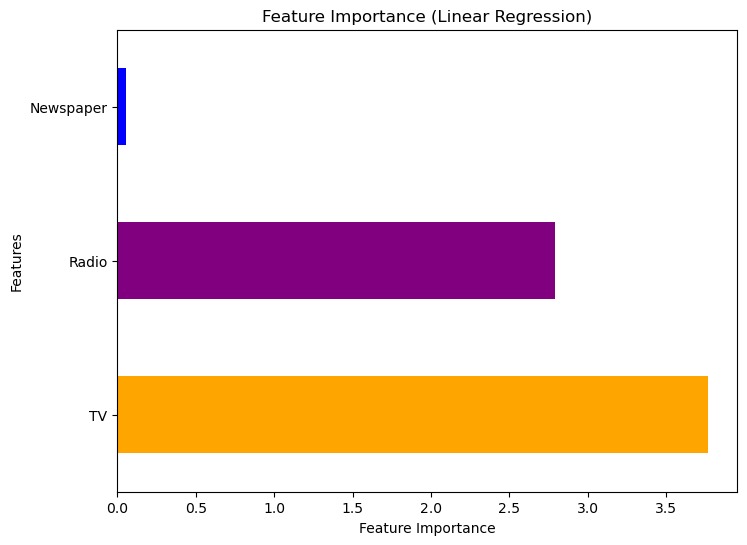

In [37]:
plt.figure(figsize=(8,6))
feat_imp.plot(kind="barh", color = ["orange","purple","blue"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Linear Regression)");

This bar chart shows the importance of different advertising channels (TV, Radio, Newspaper) in predicting sales using a linear regression model.
TV has the highest importance, followed by Radio, while Newspaper has a negligible impact.

Overall insights

TV advertising has the strongest effect on sales, followed by radio.
Newspaper advertising shows little to no impact on sales.
Businesses looking to maximize sales should prioritize TV and Radio advertisements over Newspaper ads.